In [1]:
import numpy as np, pandas as pd
import os, sys
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import joblib
from datetime import datetime, date, time, timedelta
import utils

In [2]:
input_dir = "../data/"
output_dir = "../data/processed_orig_data/"


# Generate Sine Data

In [3]:
selected = 'sine'

In [4]:
def gen_sine_data(no, seq_len, dim):   
    """Sine data generation.
    Args:
    - no: the number of samples
    - seq_len: sequence length of the time-series
    - dim: feature dimensions

    Returns:
    - data: generated data
    """ 
    size = (no, 1, dim)
    freq = np.random.uniform(0.1, 0.15, 1)  
    
    
    phase = np.random.uniform(0., 2 * np.pi, size) 
    amplitude = np.random.uniform(1, 3, size) 
    
    seq = np.arange(seq_len)
    seq = np.expand_dims(seq, axis=0)
    seq = np.expand_dims(seq, axis=-1)
    
    data = amplitude * np.sin(2 * np.pi * freq * seq + phase)    
    data = (data + 1) * 0.5
    return data

# testing for correlations
np.random.seed(0)
N, T, D = 10000, 24, 5 
sine_data = gen_sine_data(N, 24, D)
sine_data = np.array(sine_data)
sine_data = sine_data[0].reshape((-1, D))
np.corrcoef(sine_data.T)

array([[ 1.        ,  0.7607258 ,  0.4744157 , -0.27526657,  0.90768667],
       [ 0.7607258 ,  1.        ,  0.93228017,  0.41459596,  0.96288337],
       [ 0.4744157 ,  0.93228017,  1.        ,  0.71570232,  0.80003782],
       [-0.27526657,  0.41459596,  0.71570232,  1.        ,  0.15358086],
       [ 0.90768667,  0.96288337,  0.80003782,  0.15358086,  1.        ]])

In [5]:
np.random.seed(42)  # for reproducibility

N, T, D = 10000, 24, 5 
TEST_PERC = 0.00
TRAIN_PERC = 1- TEST_PERC

perc_of_train_data = [2, 5, 10, 20, 100]

full_sine_data = gen_sine_data(N, T, D)
np.random.shuffle(full_sine_data)    

for p in perc_of_train_data:
    N_small = int(N * p / 100)
    sub_sine_data = full_sine_data[np.random.choice(N, N_small, replace=False)]   
    print(sub_sine_data.shape)
    
    fname = f'{selected}_subsampled_train_perc_{p}.npz'
    full_path = os.path.join(output_dir, fname)
    print(full_path)
    
#     np.save(full_path, sine_data)
    np.savez_compressed(full_path, data=sub_sine_data)

(200, 24, 5)
../data/processed_orig_data/sine_subsampled_train_perc_2.npz
(500, 24, 5)
../data/processed_orig_data/sine_subsampled_train_perc_5.npz
(1000, 24, 5)
../data/processed_orig_data/sine_subsampled_train_perc_10.npz
(2000, 24, 5)
../data/processed_orig_data/sine_subsampled_train_perc_20.npz
(10000, 24, 5)
../data/processed_orig_data/sine_subsampled_train_perc_100.npz


# Preview data

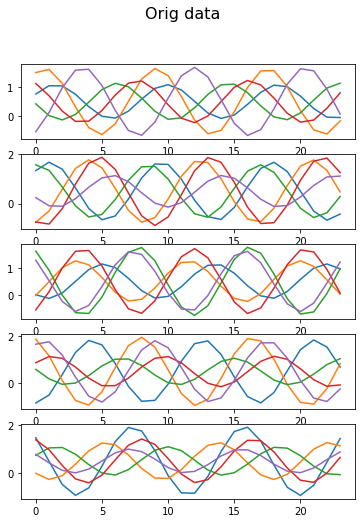

In [8]:
np.random.seed(0)
selected = 'sine'
perc = 10

loaded = np.load(f'{output_dir}{selected}_subsampled_train_perc_{perc}.npz')
data = loaded['data']
# print(data.shape)

# print("data mean : ", data.mean(axis=0).mean(axis=0)) 

utils.plot_samples(data, n=5, title='Orig data')